<a href="https://colab.research.google.com/github/jfjofilipe/Aulas_2024/blob/main/Hands_on_01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNIVERSIDADE SENAI CIMATEC
# CURSO DE ESPECIALIZAÇÃO EM COMPUTAÇÃO QUÂNTICA

## Hands-On: Circuitos Quânticos

### **Disciplina:** Fundamentos da Computação Quântica

### **Objetivos da Atividade**

* Criar **circuitos quânticos de dois qubits** contendo **matrizes de Pauli**.
* Implementar **portas quânticas** em **sistemas compostos**.
* Justificar o uso de portas quânticas para circuitos de dois qubits.
* Visualizar a evolução do estado quântico na **Esfera de Bloch** passo a passo.

---

### **Dados da Atividade**

* **Professor:** Dr. Otto Menegasso Pires
* **Alunos/Equipe:**
    * Davidson Corrêa Clem
    * João Filipe Muchanga
    * José Hidalgo Suárez
    * Wild Freitas da Silva Santos
* **Data:** 23/11/2025

---

## Preparação do Ambiente

Execute a célula abaixo **apenas se ainda não tiver** Qiskit instalado.

In [ ]:
# Instalação do Qiskit e bibliotecas necessárias
# O comando %%capture suprime a saída longa da instalação para limpar o notebook
%%capture
!pip install qiskit qiskit_aer pylatexenc cartopy matplotlib

print("Ambiente configurado e Qiskit pronto para uso.")

## Bibliotecas

- `QuantumCircuit`: construir circuitos.
- `Statevector`: extrair o vetor de estado do circuito (sem shots).
- `plot_bloch_multivector`: plotar a esfera de Bloch.
- `AerSimulator`: executar o circuito (útil para medir).

In [ ]:
# --- Importações Bibliotecas Qiskit ---
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, circuit_drawer, plot_histogram

# --- Importações do pacote Aer (Simulação) ---
from qiskit_aer import Aer, AerSimulator

# --- Importações Auxiliares ---
import numpy as np
import matplotlib.pyplot as plt

# Configuração do Backend
SIMULATOR = Aer.get_backend('qasm_simulator')

print("Bibliotecas importadas com sucesso.")


Bibliotecas importadas com sucesso.


## Circuito A: Rotações e Transformações em 1 Qubit ($q_0$)

O **Circuito A** é aplicado sobre um único qubit, $q_0$, inicialmente no estado $|0\rangle$.
Ele ilustra uma sequência de transformações unitárias fundamentais para manipular a fase e a superposição.

**Sequência de Portas Lógicas:**
1.  **Estado Inicial:** $|0\rangle$
2.  **Hadamard ($H$):** Cria uma superposição equiprovável.
3.  **Fase ($S$):** Aplica uma rotação de fase de $\pi/2$ (90°) no eixo $Z$.
4.  **Pauli-Y ($Y$):** Aplica uma rotação de $\pi$ (180°) em torno do eixo $Y$.
5.  **Rotação Genérica ($R_x(\pi/4)$):** Rotação de 45° no eixo $X$.
6.  **Rotação Genérica ($R_y(\pi)$):** Rotação de 180° no eixo $Y$.

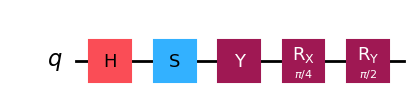

In [ ]:
#aplicando h, s, y, Rx, Ry para obter |1>
qc = QuantumCircuit(1)
qc.h(0)                    #aplica h, s, Rx, ry qubit 0
qc.s(0)
qc.y(0)
qc.rx(np.pi / 4, 0)
qc.ry(np.pi/2, 0)
display(qc.draw('mpl'))

### **1. Estado Inicial ($|0\rangle$)**
* **O que acontece:** O qubit inicia no estado fundamental "ground state".
* **Na Esfera de Bloch:** O vetor aponta verticalmente para o **Polo Norte** (eixo +Z).
* **Vetor:** $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$

--- 1. Estado Inicial |0> ---
Vetor: [1.+0.j 0.+0.j]


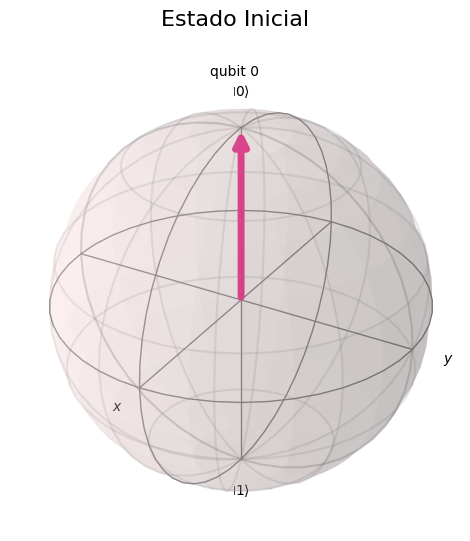

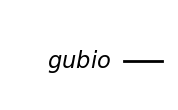

In [ ]:
# 1. Configuração Inicial (Base Limpa)
q_reg = QuantumRegister(1, 'gubio')
qc_0 = QuantumCircuit(q_reg)

print("--- 1. Estado Inicial |0> ---")
state_0 = Statevector.from_instruction(qc_0)
print(f"Vetor: {state_0.data}")
display(plot_bloch_multivector(state_0, title="Estado Inicial"))

print("\n") # Espaçamento
display(qc_0.draw('mpl'))

### **2. Após Hadamard ($H$)**
* **O que acontece:** A porta $H$ coloca o qubit em **superposição**. O estado $|0\rangle$ torna-se $|+\rangle$.
* **Na Esfera de Bloch:** O vetor desce 90° e aponta para o **eixo +X** (na linha do equador).
* **Vetor:** $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \approx [0.707, 0.707]$


--- 2. Estado após Hadamard (H) ---
Vetor: [0.70710678+0.j 0.70710678+0.j]


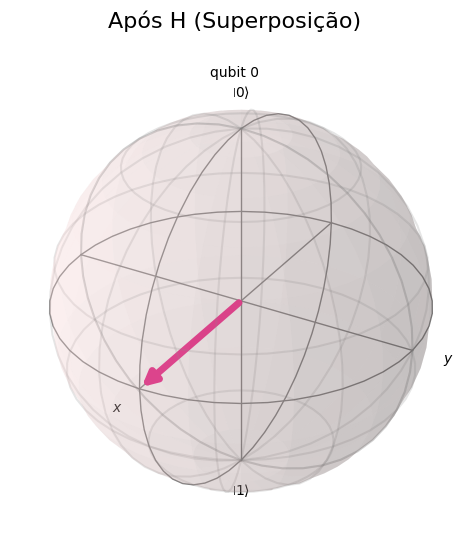

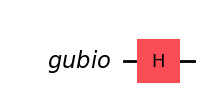

In [ ]:
# 2. Aplicação da Porta Hadamard (H)
# Coloca o qubit em superposição (|0> + |1>) / sqrt(2)
qc_1 = qc_0.copy()
qc_1.h(0)

print("\n--- 2. Estado após Hadamard (H) ---")
state_1 = Statevector.from_instruction(qc_1)
print(f"Vetor: {state_1.data}")
display(plot_bloch_multivector(state_1, title="Após H (Superposição)"))

print("\n")
display(qc_1.draw('mpl'))

#### **3. Após Fase ($S$)**
* **O que acontece:** Aplica-se uma rotação de 90° ($\pi/2$) em torno do eixo Z.
* **Na Esfera de Bloch:** O vetor percorre o equador, saindo do eixo +X e alinhando-se com o **eixo +Y**.
* **Vetor:** O estado ganha uma componente imaginária: $\frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$.


--- 3. Estado após Fase (S) ---
Vetor: [0.70710678+0.j         0.        +0.70710678j]


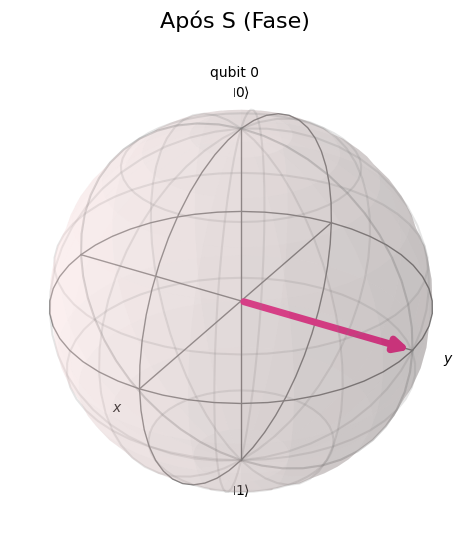

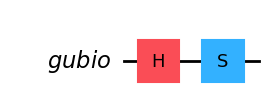

In [ ]:
# 3. Aplicação da Porta de Fase (S)
# Rotação de 90 graus (pi/2) no eixo Z
qc_2 = qc_1.copy()
qc_2.s(0)

print("\n--- 3. Estado após Fase (S) ---")
state_2 = Statevector.from_instruction(qc_2)
print(f"Vetor: {state_2.data}")
display(plot_bloch_multivector(state_2, title="Após S (Fase)"))

print("\n")
display(qc_2.draw('mpl'))


#### **4. Após Pauli-Y ($Y$)**
* **O que acontece:** Uma rotação de 180° ($\pi$) em torno do eixo Y.
* **Na Esfera de Bloch:** Como o vetor já estava alinhado com o eixo Y (do passo anterior), ele **permanece visualmente inalterado** na esfera (o vetor apenas sofre uma mudança de fase global).
* **Nota:** Isso demonstra que o estado anterior era um *autoestado* da porta Y.


--- 4. Estado após Pauli-Y (Y) ---
Vetor: [0.70710678+0.j         0.        +0.70710678j]


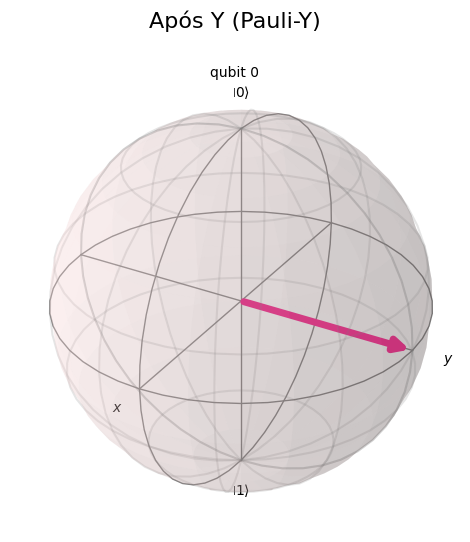

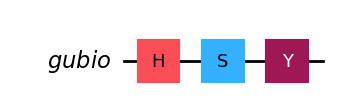

In [ ]:
# 4. Aplicação da Porta Pauli-Y (Y)
# Rotação de 180 graus (pi) no eixo Y
qc_3 = qc_2.copy()
qc_3.y(0)

print("\n--- 4. Estado após Pauli-Y (Y) ---")
state_3 = Statevector.from_instruction(qc_3)
print(f"Vetor: {state_3.data}")
display(plot_bloch_multivector(state_3, title="Após Y (Pauli-Y)"))

print("\n")
display(qc_3.draw('mpl'))

#### **5. Após Rotação $R_x(\pi/4)$**
* **O que acontece:** O qubit sofre uma rotação de 45° ($\pi/4$) em torno do eixo X.
* **Na Esfera de Bloch:** O vetor sai do equador e começa a subir em direção ao hemisfério norte (trajetória circular em torno de X).


--- 5. Estado após Rx(pi/4) ---
Vetor: [0.92387953+0.j         0.        +0.38268343j]


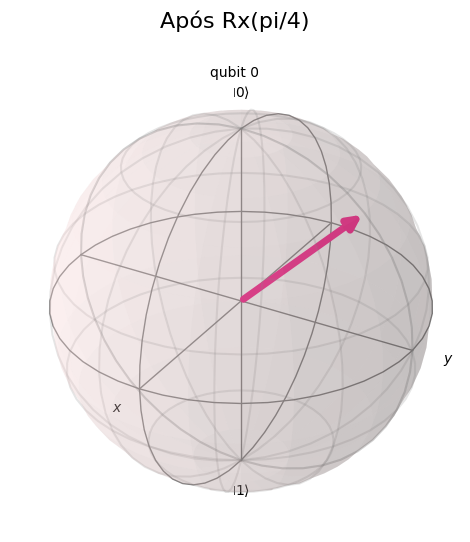

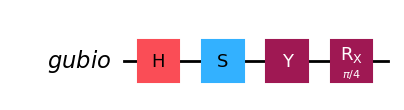

In [ ]:
# 5. Aplicação de Rotação em X (Rx pi/4)
# Rotação de 45 graus
qc_4 = qc_3.copy()
qc_4.rx(np.pi / 4, 0)

print("\n--- 5. Estado após Rx(pi/4) ---")
state_4 = Statevector.from_instruction(qc_4)
print(f"Vetor: {state_4.data}")
display(plot_bloch_multivector(state_4, title="Após Rx(pi/4)"))

print("\n")
display(qc_4.draw('mpl'))

#### **6. Estado Final: Após Rotação $R_y(\pi)$**
* **O que acontece:** Uma rotação de 180° ($\pi$) em torno do eixo Y.
* **Na Esfera de Bloch:** O vetor é rotacionado para a posição simétrica oposta no espaço de Bloch, completando a sequência de transformações.


--- 6. Estado Final após Ry(pi) ---
Vetor: [5.65713056e-17-3.82683432e-01j 9.23879533e-01+2.34326020e-17j]


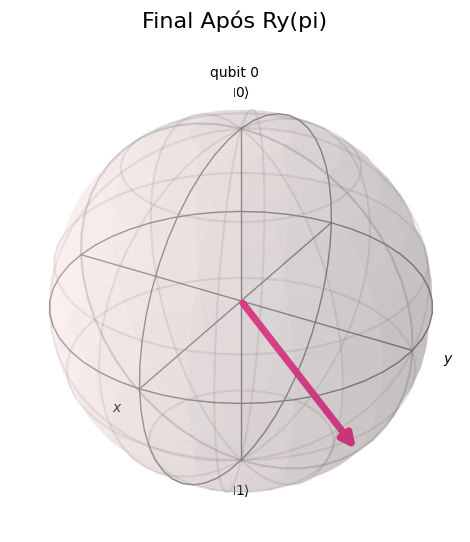

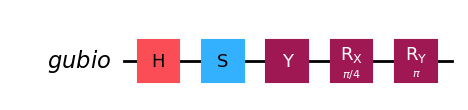

In [ ]:
# 6. Aplicação de Rotação em Y (Ry pi)
# Rotação final de 180 graus
qc_5 = qc_4.copy()
qc_5.ry(np.pi, 0)

print("\n--- 6. Estado Final após Ry(pi) ---")
state_5 = Statevector.from_instruction(qc_5)
print(f"Vetor: {state_5.data}")
display(plot_bloch_multivector(state_5, title="Final Após Ry(pi)"))

print("\n")
display(qc_5.draw('mpl'))

#### **Comparação do Estado incial com o Final**


--- Diagrama do Circuito Completo ---


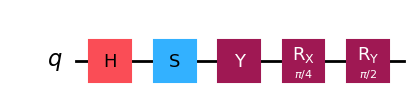

In [ ]:
# Visualização do Circuito Completo
print("\n--- Diagrama do Circuito Completo ---")
display(qc.draw('mpl'))

##  Circuito B: Entrelacamento Quântico em 2 Qubits ($q_0, q_1$)

O **Circuito B** é um sistema composto de dois qubits e introduz a porta de dois qubits **CNOT (Control-NOT)**.
A **CNOT** é crucial, pois, quando aplicada após o Hadamard em $q_0$ (como feito no circuito), gera um **Estado de Bell** (estado entrelaçado).
* **$q_0$ (Qubit de Controle):** Segue a mesma sequência de portas do Circuito A.
* **$q_1$ (Qubit Alvo):** Recebe o resultado da CNOT, seguido de $H$ e $R_y(\pi)$.

In [ ]:
#Criando um circuito com 1 qubit no estado |0>
qc = QuantumCircuit(2)  #1 qubit, começa em |0>
qc.draw()            #diagrama do circuito

q_0: 
     
q_1:

### **Estado Inicial**

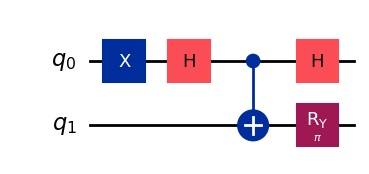

In [ ]:
#aplicando x, h, cx, Rx para obter |1>
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)                    #aplica h, s, Rx, ry qubit 0
qc.cx(0, 1)
qc.h(0)
qc.ry(np.pi, 1)
display(qc.draw('mpl'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **Estado 1: Após a Porta X**

In [ ]:
# Estado 1: Após a Porta X
qc = QuantumCircuit(2)
qc.x(0)
print(qc)

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          


#### **Cálculo e Visualização do vector apos a aplicacao da porta X**

Estado do vector apos a porta x Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


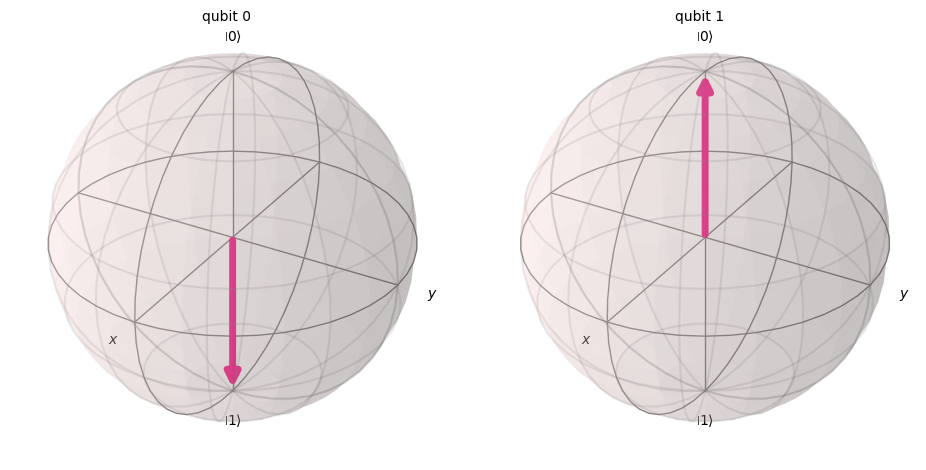

In [ ]:
# Cálculo e Visualização do vector apos a aplicacao da porta X
sv = Statevector(qc)
print('Estado do vector apos a porta x', sv)

#Mostrar o vector na esfera de bloch
display(plot_bloch_multivector(sv))

### **Aplicacao da porta H**

In [ ]:
#Aplicacao da porta H
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
print(qc)

     ┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     └───┘└───┘
q_1: ──────────
               


#### **Calculo e visualizacao do vector apos aplicacao da porta H**

Estado do vector apos aplicacao da porta H Statevector([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j],
            dims=(2, 2))


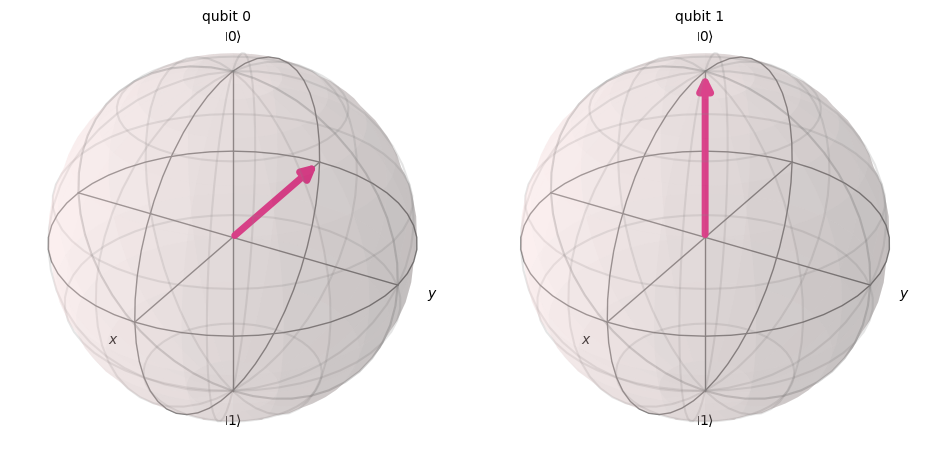

In [ ]:
#Calculo e visualizacao do vector apos aplicacao da porta H
sv = Statevector(qc)
print('Estado do vector apos aplicacao da porta H', sv)

#Mostrar o vector na esfera de bloch
display(plot_bloch_multivector(sv))

### **Aplicação da porta CNOT CX**

In [ ]:
#Aplicação da porta CNOT CX
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)
print(qc)

     ┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘


#### **Calculo e Visualizacao do vector apos aplicacao da porta CNOT**

Estado do vector apos a aplicacao da porta CNOT Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


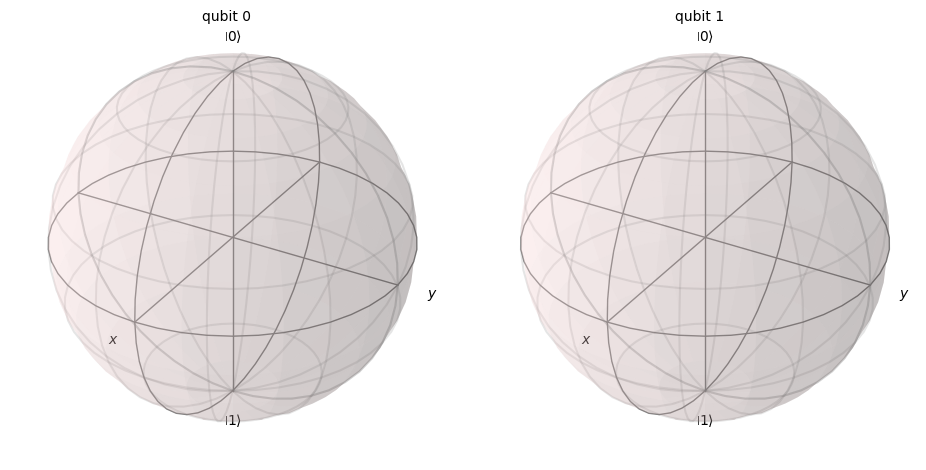

In [ ]:
#Calculo e Visualizacao do vector apos aplicacao da porta CNOT
sv = Statevector(qc)
print('Estado do vector apos a aplicacao da porta CNOT', sv)

#Mostrar o vector na esfera de bloch
display(plot_bloch_multivector(sv))


### **Aplicacao da porta H**

In [ ]:
#Aplicacao da porta H
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)
qc.h(0)
print(qc)

     ┌───┐┌───┐     ┌───┐
q_0: ┤ X ├┤ H ├──■──┤ H ├
     └───┘└───┘┌─┴─┐└───┘
q_1: ──────────┤ X ├─────
               └───┘     


#### **Calcular e Visualizar o vector apos aplicacao da porta H**

Estado do vector apos aplicacao da porta H na esfera de bloch Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


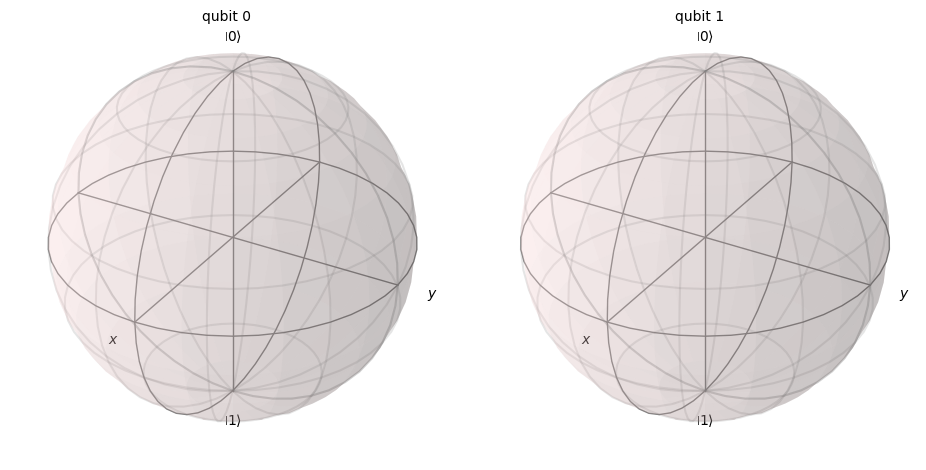

In [ ]:
#Calcular e Visualizar o vector apos aplicacao da porta H
sv = Statevector(qc)
print('Estado do vector apos aplicacao da porta H na esfera de bloch', sv)

#Mostrando o vector na esfera de bloch
display(plot_bloch_multivector(sv))

### **Porta Ry**

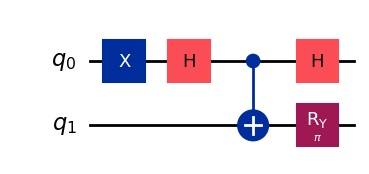

In [ ]:
#Aplicar a porta Ry
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)
qc.h(0)
qc.ry(np.pi, 1)
#print(qc)
display(qc.draw('mpl'))

#### **Visualização da Porta Ry**

Estado do vetor apos aplicacao da porta Ry Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


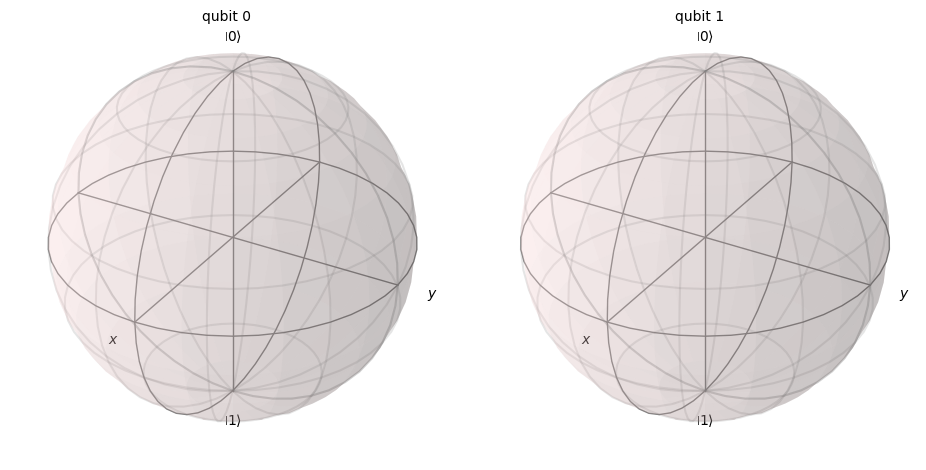

In [ ]:
#Calcular e Visualizar o estado do vector
sv = Statevector(qc)
print('Estado do vetor apos aplicacao da porta Ry', sv)

#Mostrar o vector na esfera de bloch
display(plot_bloch_multivector(sv))
